In [1]:
import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import copy

import dijkstra as dijk
import stacked_graph as sg
import testing as test
import graph_visualization as gv

# 1

In [2]:

# read_json_path = '/home/rjtomich/photonic_compiler/model_to_graph/gpt2_graph.json'
# # read_json_path = '/home/rjtomich/photonic_compiler/model_to_graph/bert-base-uncased_graph.json'
# # read_json_path = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph.json'
# # read_json_path = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph_NoFusion.json'
# with open(read_json_path)  as json_file:
#     raw_json = json.load(json_file) # returns json file as dict

# graph = sg.StackedGraph(raw_json=raw_json)

# subgraphs = list(dijk.graph_partition(graph))
# dijk.select_nodes(graph, subgraphs)


In [3]:
# groups = list(graph.get_node_groups(ASAP = False))
# print(test.group_validate(graph, groups))
# for group in groups:
#     print(group)


In [4]:
# n_graphs = len(groups)
# n_cols = 6  # Number of columns for the grid
# n_rows = (n_graphs + n_cols - 1) // n_cols  # Calculate the number of rows needed

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))
# axes = axes.flatten()  # Flatten the array of axes


# for i in range(len(groups)):
#     if i >= 0:
#         test_group = groups[i]

#         start_stack = sg.StackedNode(0, [], [[]], [[]], opp='start', func_stack=['start'], cost_stack=[0])
#         first_stack = copy.deepcopy(graph.stack_list[graph.id_to_idx[test_group[0]]])
#         first_stack.parents = [0]

#         subgraph_stack_list = [start_stack, first_stack]
#         for stack_id in test_group[1:]:
#             stack = graph.stack_list[graph.id_to_idx[stack_id]]
#             new_node = copy.deepcopy(stack)
#             new_node.parents = set(new_node.parents) - graph.load_nodes
#             subgraph_stack_list.append(new_node)


#         new_graph = sg.StackedGraph(stack_list=subgraph_stack_list)
#         # gv.adj_to_graph(new_graph.adj_matrix, save=False, layout = 'spectral')
#         # gv.adj_to_graph(new_graph, save=False, layout = 'kk', title = f'Subgraph {i}')
#         gv.adj_to_graph(new_graph, ax=axes[i], layout='kk', title=f'Subgraph {i+1}')


# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])


# plt.tight_layout()
# plt.show()


# 2

In [5]:
subgraph_to_plot = 3

# read_json_path = '/home/rjtomich/photonic_compiler/model_to_graph/gpt2_graph.json'
read_json_path = '/home/rjtomich/photonic_compiler/model_to_graph/bert-base-uncased_graph.json'
# read_json_path = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph.json'
# read_json_path = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph_NoFusion.json'
with open(read_json_path)  as json_file:
    raw_json = json.load(json_file) # returns json file as dict
graph = sg.StackedGraph(raw_json=raw_json)


subgraphs = list(dijk.graph_partition(graph))
dijk.select_nodes(graph, subgraphs)

In [6]:
def draw_subgraphs(graph, sub='all'):
    subgraphs = list(dijk.graph_partition(graph))
    dijk.select_nodes(graph, subgraphs)

    if sub == 'all':
        n_graphs = len(subgraphs)
        n_cols = 6  # Number of columns for the grid
        n_rows = (n_graphs + n_cols - 1) // n_cols  # Calculate the number of rows needed

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))
        axes = axes.flatten()  # Flatten the array of axes

        for i in range(len(subgraphs)):
            gv.adj_to_graph(subgraphs[i], ax=axes[i], layout='kk', title=f'Subgraph {i+1}')

        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

    else:
        fig, ax = plt.subplots(figsize=(6, 6))
        gv.adj_to_graph(subgraphs[sub], ax=ax, layout='kk', title=f'Subgraph {sub}')


    plt.tight_layout()
    plt.show()

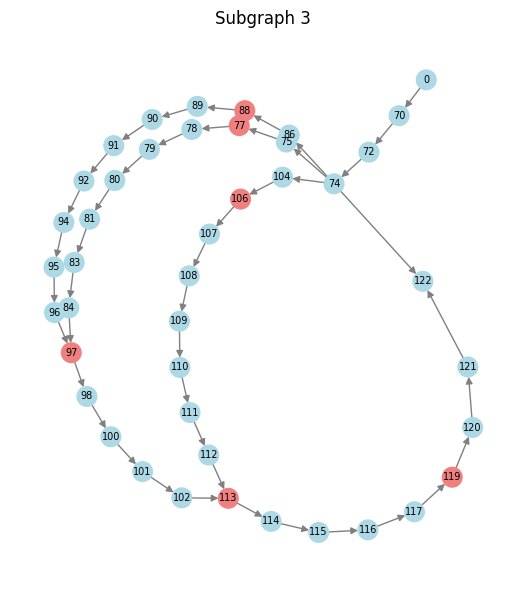

In [7]:
# draw_subgraphs(graph)
draw_subgraphs(graph, sub=subgraph_to_plot)
# draw_subgraphs(graph, sub='all')

# Timeline

In [8]:
# read_json_path = '/home/rjtomich/photonic_compiler/model_to_graph/gpt2_graph.json'
# # read_json_path = '/home/rjtomich/photonic_compiler/model_to_graph/bert-base-uncased_graph.json'
# # read_json_path = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph.json'
# # read_json_path = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph_NoFusion.json'
# with open(read_json_path)  as json_file:
#     raw_json = json.load(json_file) # returns json file as dict
# graph = sg.StackedGraph(raw_json=raw_json)

# subgraphs = list(dijk.graph_partition(graph))
# dijk.select_nodes(graph, subgraphs)
# dijk.scheduling_dijkstra(subgraphs[2])


In [9]:
def make_schedule(graph):
    data = {
        'task': [],
        'start': [],
        'end': [],
        'label': []  # Labels for the blocks
    }

    # for stack in graph.stack_list[16:-6]:
    for stack in graph.stack_list[1:]:
        data['task'].append(stack.hardware_selection)
        data['start'].append(stack.start_time)
        data['end'].append(stack.start_time + stack.cost_stack[stack.func_selection])
        data['label'].append(stack.oppid)



    df = pd.DataFrame(data)
    print(df)

    unique_combinations = df[['task', 'label']].drop_duplicates()
    colors = plt.cm.get_cmap('tab10', len(unique_combinations))

    color_map = {}
    for idx, (task, label) in enumerate(unique_combinations.itertuples(index=False)):
        color_map[(task, label)] = colors(idx)


    fig, ax = plt.subplots(figsize=(30, 3))

    # Iterate over each row in the dataframe and plot a horizontal line
    for index, row in df.iterrows():
        task_label = (row['task'], row['label'])
        task_color = color_map[task_label]
        ax.hlines(y=row['task'], xmin=row['start'], xmax=row['end'], color=task_color, linewidth=35)

        # Adding label on the bar
        label_text = f"{row['label']}"
        ax.text((row['start'] + row['end']) / 2, row['task'], label_text, color='black', ha='center', va='center')

    # Customize the plot
    ax.set_xlabel('Time')
    ax.set_ylabel('Task')
    ax.set_title('Task Schedule')
    ax.grid(True)
    # ax.legend()

    # plt.tight_layout()
    plt.show()
#

    task     start       end  label
0   CPU1  0.000000  0.000046     70
1   CPU1  0.000046  0.000092     72
2   CPU1  0.000094  0.000140     74
3   CPU1  0.000141  0.000141     86
4   PHU1  0.000860  0.001214     88
5   CPU2  0.000141  0.000141     75
6   CPU1  0.001219  0.001219     89
7   PHU1  0.000502  0.000856     77
8   CPU1  0.001223  0.001269     90
9   CPU1  0.000860  0.000860     78
10  CPU1  0.001271  0.001271     91
11  CPU1  0.000865  0.000911     79
12  CPU1  0.001272  0.001318     92
13  CPU1  0.000912  0.000912     80
14  CPU1  0.000143  0.000143    104
15  CPU1  0.001319  0.001366     94
16  CPU1  0.000914  0.000960     81
17  PHU1  0.000144  0.000498    106
18  CPU1  0.001367  0.001367     95
19  CPU1  0.000961  0.001007     83
20  CPU1  0.000502  0.000502    107
21  CPU1  0.001368  0.001415     96
22  CPU1  0.001009  0.001009     84
23  CPU1  0.000507  0.000553    108
24  PHU1  0.001416  0.001419     97
25  CPU1  0.000554  0.000554    109
26  CPU1  0.001423  0.001423

/tmp/ipykernel_3405231/2488350464.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_combinations))


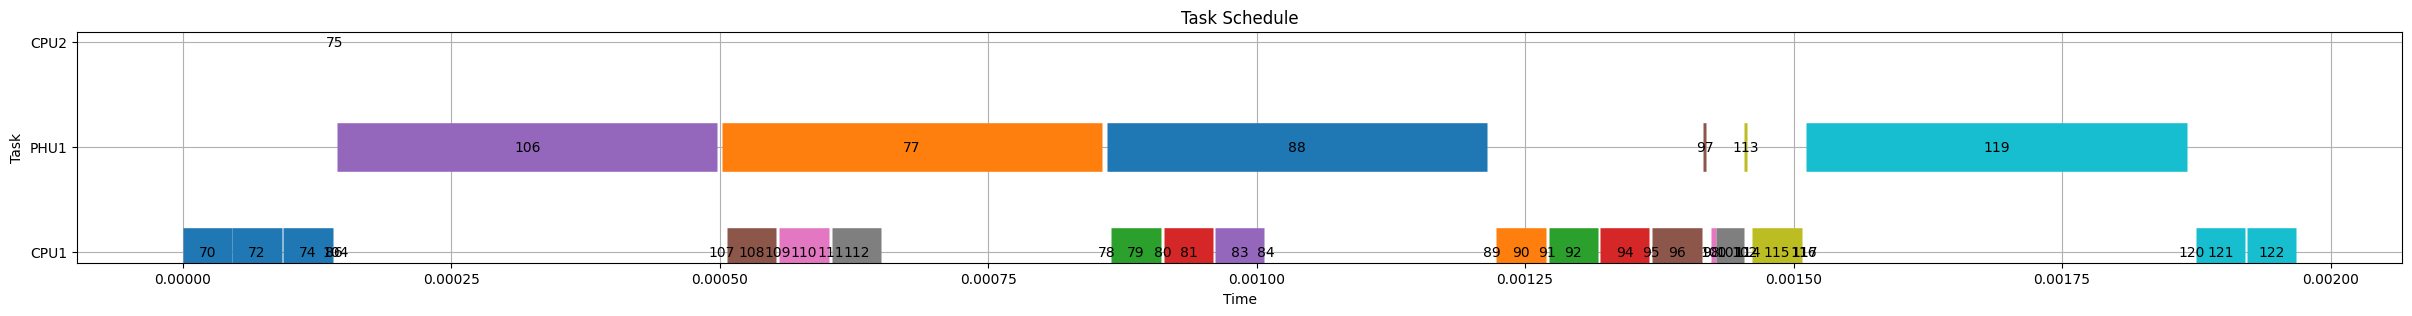

In [10]:
# available_hardware = {'CPU': {'CPU1': 0, 'CPU2': 0, 'CPU3': 0, 'CPU4': 0}, 'PHU': {'PHU1': 0, 'PHU2': 0, 'PHU3': 0} }
# available_hardware = {'CPU': {'CPU1': 0, 'CPU2': 0, 'CPU3': 0, 'CPU4': 0}, 'PHU': {'PHU1': 0, 'PHU2': 0} }
# available_hardware = {'CPU': {'CPU1': 0, 'CPU2': 0, 'CPU3': 0, 'CPU4': 0}, 'PHU': {'PHU1': 0} }

# available_hardware = {'CPU': {'CPU1': 0, 'CPU2': 0}, 'PHU': {'PHU1': 0, 'PHU2': 0, 'PHU3': 0} }
# available_hardware = {'CPU': {'CPU1': 0}, 'PHU': {'PHU1': 0, 'PHU2': 0, 'PHU3': 0} }
# available_hardware = {'CPU': {'CPU1': 0, 'CPU2': 0, 'CPU3': 0, 'CPU4': 0}, 'PHU': {'PHU1': 0} }
# available_hardware = {'CPU': {'CPU1': 0, 'CPU2': 0, 'CPU3': 0}, 'PHU': {'PHU1': 0} }
# available_hardware = {'CPU': {'CPU1': 0, 'CPU2': 0,}, 'PHU': {'PHU1': 0} }
available_hardware = {'CPU': {'CPU1': 0,}, 'PHU': {'PHU1': 0} }
dijk.scheduling_dijkstra(subgraphs[subgraph_to_plot], available_hardware=available_hardware)
make_schedule(subgraphs[subgraph_to_plot])

In [11]:

# read_json_path = '/home/rjtomich/photonic_compiler/model_to_graph/gpt2_graph.json'
# # read_json_path = '/home/rjtomich/photonic_compiler/model_to_graph/bert-base-uncased_graph.json'
# # read_json_path = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph.json'
# # read_json_path = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph_NoFusion.json'
# with open(read_json_path)  as json_file:
#     raw_json = json.load(json_file) # returns json file as dict


# graph = sg.StackedGraph(raw_json=raw_json)
# # gv.adj_to_graph(graph.adj_matrix, save=True, layout = 'spectral')
# subgraphs = list(dijk.graph_partition(graph))
# dijk.select_nodes(graph, subgraphs)
# end_time = dijk.schdeule_nodes(graph, subgraphs)

# make_schedule(graph)
